# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:
fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [10]:
def value_clean(value):
    x = value.replace('€', '')
    if 'M' in x:
        x = x.replace('M', '')
        x = float(x)*1e6
    elif 'K' in x:
        x = x.replace('K', '')
        x = float(x)*1e3
    else:
        x = float(x)
    return x

In [11]:
fifa['ValueNumeric'] =  fifa['Value'].apply(value_clean)
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500000.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000000.0


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [13]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols # ordinary least squares

In [18]:
w_ols = ols("ValueNumeric ~ C(fifa['Position'])*C(fifa['Preferred Foot'])",fifa).fit()
table = sm.stats.anova_lm(w_ols)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(fifa['Position']),26.0,1.649609e+16,6.344651e+14,20.957327,6.868224e-97
C(fifa['Preferred Foot']),1.0,2.341622e+14,2.341622e+14,7.734728,5.422475e-03
C(fifa['Position']):C(fifa['Preferred Foot']),26.0,5.152828e+15,1.981857e+14,6.546369,5.153228e-23
Residual,18093.0,5.477500e+17,3.027414e+13,NaN,NaN


What is your conclusion from this ANOVA?

In [19]:
# p-value (PR(>F)) >> .05 -> Reject Ho

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [21]:
w_ols = ols("ValueNumeric ~ C(fifa['Nationality'])",fifa).fit()
table = sm.stats.anova_lm(w_ols)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(fifa['Nationality']),163.0,3.281224e+16,2.013021e+14,6.762478,4.840477e-134
Residual,18043.0,5.370951e+17,2.976751e+13,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
# Same conclusion:
# p-value (PR(>F)) >>> .05 -> Reject Ho

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [22]:
# total rows
fifa.shape[0]

18207

In [25]:
# total NaNs
fifa.isna().sum().sum()

877

In [29]:
# drop rows with NaNs
fifa = fifa.dropna()
fifa.shape[0]

17918

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [32]:
X = sm.add_constant(fifa[['Stamina', 'SprintSpeed']]) 
Y = fifa['ValueNumeric']

In [33]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Sat, 21 Mar 2020   Prob (F-statistic):          8.04e-193
Time:                        22:53:26   Log-Likelihood:            -3.0350e+05
No. Observations:               17918   AIC:                         6.070e+05
Df Residuals:                   17915   BIC:                         6.070e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -3.07e+06   1.97e+05    -15.600      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [11]:
# High F-Statistic:
# Much more variation between sample Means than variation within samples.

# Low R2: 
# Only .048 of ValueNumeric variability is defined by input variables. 

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [34]:
X = sm.add_constant(fifa['Potential']) 
Y = fifa['ValueNumeric']

In [35]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Sat, 21 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:57:51   Log-Likelihood:            -3.0027e+05
No. Observations:               17918   AIC:                         6.006e+05
Df Residuals:                   17916   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.544e+07      4e+05    -88.693      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# Higger F-Statistic:
# Much more variation between sample Means than variation within samples.

# Significant R2: 
# 0.336 of ValueNumeric variability is defined by Potential.

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

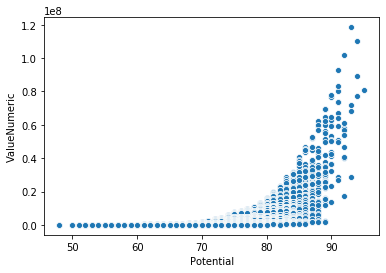

In [36]:
sns.scatterplot(fifa['Potential'], fifa['ValueNumeric'])

In [37]:
# There's an apparent linear relationship once Potential exceeds the value of 70.